<a href="https://colab.research.google.com/github/taka7peace/iTech_intern/blob/main/intern_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Explore, Cleaning

##Let's read all the data

##Let's list file names in a folder

In [ ]:
import os
path = f'/content/drive/MyDrive/使用データ'
os.chdir(path)

In [ ]:
current_dir = os.getcwd()
current_dir

'/content/drive/MyDrive/使用データ'

In [ ]:
os.listdir(current_dir)

['tbl_order_202007.csv',
 'tbl_order_202004.csv',
 'tbl_order_202002.csv',
 'tbl_order_201906.csv',
 'tbl_order_201904.csv',
 'tbl_order_201908.csv',
 'tbl_order_202005.csv',
 'tbl_order_201911.csv',
 'm_area.csv',
 'tbl_order_201905.csv',
 'tbl_order_201907.csv',
 'tbl_order_202006.csv',
 'tbl_order_201912.csv',
 'tbl_order_201909.csv',
 'tbl_order_202001.csv',
 'tbl_order_201910.csv',
 'm_store.csv',
 'tbl_order_202003.csv',
 'output_data',
 '1_昭島店.xlsx',
 'output']

In [ ]:
tbl_order_file = os.path.join(current_dir, 'tbl_order_*.csv')
tbl_order_file

In [ ]:
import glob
tbl_order_files = glob.glob(tbl_order_file)
tbl_order_files

Let's merge (union) multiple data

In [ ]:
import pandas as pd 
order_all = pd.DataFrame()
for file in tbl_order_files:
    order_data = pd.read_csv(file)
    print(f'{file}:{len(order_data)}')
    order_all = pd.concat([order_all, order_data], ignore_index=True)

/content/drive/MyDrive/使用データ/tbl_order_202007.csv:241084
/content/drive/MyDrive/使用データ/tbl_order_202004.csv:233260
/content/drive/MyDrive/使用データ/tbl_order_202002.csv:225564
/content/drive/MyDrive/使用データ/tbl_order_201906.csv:233295
/content/drive/MyDrive/使用データ/tbl_order_201904.csv:233393
/content/drive/MyDrive/使用データ/tbl_order_201908.csv:241122
/content/drive/MyDrive/使用データ/tbl_order_202005.csv:241139
/content/drive/MyDrive/使用データ/tbl_order_201911.csv:233191
/content/drive/MyDrive/使用データ/tbl_order_201905.csv:241041
/content/drive/MyDrive/使用データ/tbl_order_201907.csv:240976
/content/drive/MyDrive/使用データ/tbl_order_202006.csv:233301
/content/drive/MyDrive/使用データ/tbl_order_201912.csv:241052
/content/drive/MyDrive/使用データ/tbl_order_201909.csv:233215
/content/drive/MyDrive/使用データ/tbl_order_202001.csv:241049
/content/drive/MyDrive/使用データ/tbl_order_201910.csv:241060
/content/drive/MyDrive/使用データ/tbl_order_202003.csv:241087


##Let's check the statistics of data

In [ ]:
order_all.isnull().sum()

order_id             0
store_id             0
customer_id          0
coupon_cd            0
sales_detail_id      0
order_accept_date    0
delivered_date       0
takeout_flag         0
total_amount         0
status               0
dtype: int64

In [ ]:
order_all.describe()

,order_id,store_id,coupon_cd,sales_detail_id,takeout_flag,total_amount,status
count,3.794829e+06,3.794829e+06,3.794829e+06,3.794829e+06,3.794829e+06,3.794829e+06,3.794829e+06
mean,5.001858e+07,1.039434e+02,4.950971e+01,5.002019e+07,2.596847e-01,2.960630e+03,3.081374e+00
std,2.887841e+07,8.644298e+01,2.887329e+01,2.886169e+07,4.384616e-01,9.542901e+02,2.834766e+00
min,2.200000e+01,1.000000e+00,0.000000e+00,2.200000e+01,0.000000e+00,6.980000e+02,1.000000e+00
25%,2.501929e+07,5.100000e+01,2.500000e+01,2.503382e+07,0.000000e+00,2.308000e+03,2.000000e+00
50%,5.002768e+07,9.900000e+01,4.900000e+01,5.003816e+07,0.000000e+00,2.808000e+03,2.000000e+00
75%,7.505113e+07,1.480000e+02,7.500000e+01,7.503084e+07,1.000000e+00,3.617000e+03,2.000000e+00
max,9.999998e+07,9.990000e+02,9.900000e+01,9.999996e+07,1.000000e+00,5.100000e+03,9.000000e+00


In [ ]:
order_all['total_amount'].describe()

count    3.794829e+06
mean     2.960630e+03
std      9.542901e+02
min      6.980000e+02
25%      2.308000e+03
50%      2.808000e+03
75%      3.617000e+03
max      5.100000e+03
Name: total_amount, dtype: float64

In [ ]:
print(order_all["order_accept_date"].min())
print(order_all["order_accept_date"].max())
print(order_all["delivered_date"].min())
print(order_all["delivered_date"].max())

##Let's exclude unnecessary data

In [ ]:
order_data = order_all.loc[order_all['store_id'] != 999]
order_data

Let's Join Master Data

In [ ]:
m_area = pd.read_csv('m_area.csv')
m_area
m_store= pd.read_csv('m_store.csv')
m_store

In [ ]:
order_data = pd.merge(order_data, m_store, on='store_id', how='left')
order_data

In [ ]:
order_data = pd.merge(order_data, m_area, on='area_cd', how='left')
order_data

##Let's set a name to the code which master does not exist.

In [ ]:
order_data.loc[order_data['takeout_flag'] == 0, 'takeout_name'] = 'Delivery'
order_data.loc[order_data['takeout_flag'] == 1, 'takeout_name'] = 'Take Out'
order_data

In [ ]:
order_data.loc[order_data['status'] == 0, 'status_name'] = 'Reception'
order_data.loc[order_data['status'] == 1, 'status_name'] = 'Payment Completed'
order_data.loc[order_data['status'] == 2, 'status_name'] = 'Delivered'
order_data.loc[order_data['status'] == 9, 'status_name'] = 'Cancel'
order_data

##Let's output basic analysis table


In [ ]:
output_dir = os.path.join(current_dir, 'output_data')
os.makedirs(output_dir, exist_ok=True)

In [ ]:
output_file = os.path.join(output_dir, 'order_data.csv')
order_data.to_csv(output_file, index=False)

##Let's read the data and exclude unnecessary items

In [ ]:
order_data = order_data.loc[(order_data['status'] == 1)|(order_data['status'] == 2)]
print(len(order_data))
order_data.columns

In [ ]:
analyze_data = order_data[['store_id', 'customer_id', 'coupon_cd', 
       'order_accept_date', 'delivered_date', 'total_amount',
       'store_name', 'wide_area', 'narrow_area',
       'takeout_name', 'status_name']]
print(analyze_data.shape)
analyze_data.head()

##Let's grasp the whole image of data

In [ ]:
analyze_data.describe()

In [ ]:
analyze_data.dtypes

In [ ]:
analyze_data[['store_id', 'coupon_cd']] = analyze_data[['store_id', 'coupon_cd']].astype(str)
analyze_data.dtypes

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
analyze_data.describe()

##Let's total up sales by month

In [ ]:
analyze_data['order_accept_date'] = pd.to_datetime(analyze_data['order_accept_date'])
analyze_data['order_accept_month'] = analyze_data['order_accept_date'].dt.strftime('%Y%m')
analyze_data[['order_accept_date', 'order_accept_month']].head()

In [ ]:
analyze_data['delivered_date'] = pd.to_datetime(analyze_data['delivered_date'])
analyze_data['delivered_month'] = analyze_data['delivered_date'].dt.strftime('%Y%m')
analyze_data[['delivered_date', 'delivered_month']].head()

In [ ]:
month_data = analyze_data.groupby('order_accept_month')
month_data.describe()

In [ ]:
month_data.sum()

##Let's Visualize Monthly Trends

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
month_data.sum().plot()

In [ ]:
month_data.mean().plot()

##Let's make a histogram from sales

In [ ]:
plt.hist(analyze_data['total_amount'])

In [ ]:
plt.hist(analyze_data['total_amount'], bins=21)

##Let's Aggregate and Visualize Sales by Prefecture

In [ ]:
pre_data = pd.pivot_table(analyze_data, index='order_accept_month', columns='narrow_area', values='total_amount', aggfunc='mean')
pre_data

In [ ]:
pip install japanize-matplotlib

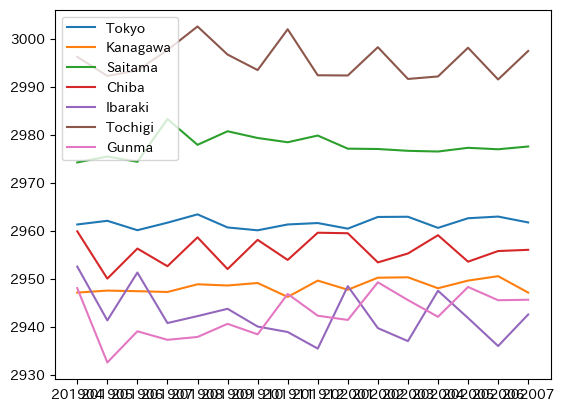

In [ ]:
import japanize_matplotlib
plt.plot(list(pre_data.index), pre_data['東京'], label='Tokyo')
plt.plot(list(pre_data.index), pre_data['神奈川'], label='Kanagawa')
plt.plot(list(pre_data.index), pre_data['埼玉'], label='Saitama')
plt.plot(list(pre_data.index), pre_data['千葉'], label='Chiba')
plt.plot(list(pre_data.index), pre_data['茨城'], label='Ibaraki')
plt.plot(list(pre_data.index), pre_data['栃木'], label='Tochigi')
plt.plot(list(pre_data.index), pre_data['群馬'], label='Gunma')
plt.legend()

##Let's Process Data for Clustering

In [ ]:
store_clustering = analyze_data.groupby('store_id').agg(['size','mean','median', 'max', 'min'])['total_amount']
store_clustering.reset_index(inplace = True, drop = True)
print(len(store_clustering))
store_clustering.head()

In [ ]:
print(store_clustering.head())

In [ ]:
import seaborn as sns
hexbin = sns.jointplot(x='mean', y='size', data=store_clustering, kind='hex')

##Let's Group Stores by Clustering


In [ ]:
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
store_clustering_sc = sc.fit_transform(store_clustering)

kmeans = KMeans(n_clusters = 4, random_state=0)
clusters = kmeans.fit(store_clustering_sc)
store_clustering['cluster'] = clusters.labels_
print(store_clustering['cluster'].unique())
store_clustering.head()

##Let's analyze group trends

In [ ]:
store_clustering.columns = ['Order/Month', 'Average/Month', 'Median/Month', 'Max/Month', 'Min/Month', 'cluster']
store_clustering.groupby('cluster').count()

In [ ]:
store_clustering.groupby('cluster').mean()

##Let's visualize the result of clustering with t-SNE

In [ ]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
x = tsne.fit_transform(store_clustering_sc)
tsne_df = pd.DataFrame(x)
tsne_df['cluster'] = store_clustering['cluster']
tsne_df.columns = ['axis_0', 'axis_1', 'cluster']
tsne_df.head()

In [ ]:
tsne_graph = sns.scatterplot(x='axis_0', y='axis_1', hue='cluster', data=tsne_df)

#Build a visualization mechanism

##Let's try to narrow down stores and visualize them

In [ ]:
import pandas as pd
from IPython.display import display, clear_output

In [ ]:
from ipywidgets import Dropdown

def order_by_store(val):
    clear_output()
    display(dropdown)    
    pick_data = order_data.loc[(order_data['store_name']==val['new']) & (order_data['status'].isin([1, 2]))]
    display(pick_data.head())

store_list = m_store['store_name'].tolist()

dropdown = Dropdown(options=store_list)
dropdown.observe(order_by_store, names='value')
display(dropdown)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import japanize_matplotlib

def graph_by_store(val):
    clear_output()
    display(dropdown2)
    pick_data = order_data.loc[(order_data['store_name']==val['new']) & (order_data['status'].isin([1, 2]))]
    temp = pick_data[['order_accept_date', 'total_amount']].copy()  
    temp.loc[:,'order_accept_date'] = pd.to_datetime(temp['order_accept_date'])
    temp.set_index('order_accept_date', inplace=True)
    temp.resample('D').sum().plot()
    
dropdown2 = Dropdown(options=store_list)
dropdown2.observe(graph_by_store, names='value')
display(dropdown2)

##Let's try to visualize details of multiple stores

In [ ]:
from ipywidgets import SelectMultiple

def order_by_multi(val):
    clear_output()
    display(select)
    pick_data = order_data.loc[(order_data['store_name'].isin(val['new']))  & (order_data['status'].isin([1, 2]))]
    display(pick_data.head())

select = SelectMultiple(options=store_list)
select.observe(order_by_multi, names='value')
display(select)

SelectMultiple(index=(1,), options=('昭島店', 'あきる野店', '足立店', '北千住店', '綾瀬店', '荒川店', '東尾久店', '板橋店', '高島平店', '稲城店',…

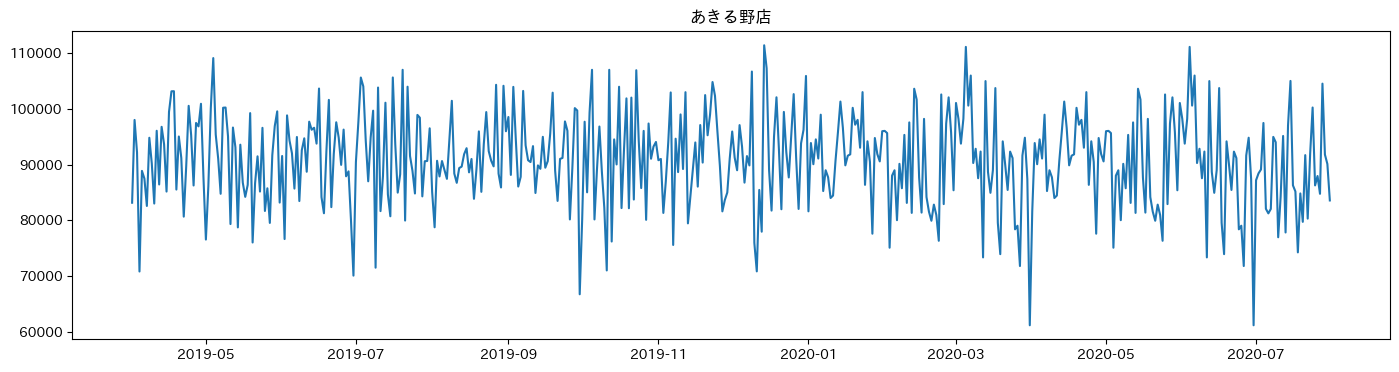

In [104]:
def graph_by_multi(val):
    clear_output()
    display(select2)
    
    fig = plt.figure(figsize=(17,4))
    plt.subplots_adjust(wspace=0.25, hspace=0.6)
    
    i = 0
    
    for trg in val['new']:
        pick_data = order_data[(order_data['store_name']==trg) & (order_data['status'].isin([1, 2]))]
        temp = pick_data[['order_accept_date', 'total_amount', 'store_name']].copy()
        temp.loc[:,'order_accept_date'] = pd.to_datetime(temp['order_accept_date'])
        temp.set_index('order_accept_date', inplace=True)
        i += 1
        ax = fig.add_subplot(1, len(val['new']), i)
        ax.plot(temp.resample('D').sum())
        ax.set_title(trg)
        
    
select2 = SelectMultiple(options=store_list)
select2.observe(graph_by_multi, names='value')
display(select2)

In [107]:
from ipywidgets import IntSlider

def store_lower(val):
    clear_output()
    display(slider)
    temp = order_data.groupby('store_name')
    print(temp.size()[temp.size() < val['new']])

slider = IntSlider(value=1100, min=1000, max=2000, step=100, description='件数:',)
slider.observe(store_lower, names='value')
display(slider)

IntSlider(value=1300, description='件数:', max=2000, min=1000, step=100)

Series([], dtype: int64)


In [106]:
def store_upper(val):
    clear_output()
    display(slider2)
    temp = order_data.groupby('store_name')
    print(temp.size()[temp.size() > val['new']])

slider2 = IntSlider(value=1600, min=1000, max=2000, step=100, description='Order:',)
slider2.observe(store_upper, names='value')
display(slider2)

IntSlider(value=1500, description='Order:', max=2000, min=1000, step=100)

store_name
あきる野店     15222
さいたま南店    19889
さいたま緑店    13674
さいたま西店    15669
つくば店      16782
          ...  
高津店       14840
高田馬場店     14060
鴻巣店       14757
鶴見店       19668
麻生店       17973
Length: 195, dtype: int64


##Let's Extract Regional Data with Toggle Button

In [108]:
from ipywidgets import ToggleButtons

area_list = m_area['wide_area'].unique()

def order_by_area(val):
    clear_output()
    display(toggle)
    pick_data = order_data.loc[(order_data['wide_area'] == val['new']) & (order_data['status'].isin([1, 2]))]
    display(pick_data.head())

toggle = ToggleButtons(options=area_list)
toggle.observe(order_by_area, names='value')
display(toggle)

ToggleButtons(index=1, options=('東京', '神奈川', '千葉', '埼玉', '北関東'), value='神奈川')

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name,order_date
17,80462724,119,C45005999,42,95571812,2020-07-01 11:01:01,2020-07-01 11:34:01,1,3901,1,神奈川店,KN,神奈川,神奈川,Take Out,Payment Completed,2020-07-01
19,26937832,116,C61849901,5,3872901,2020-07-01 11:01:01,2020-07-01 11:39:01,0,2827,2,旭店,KN,神奈川,神奈川,Delivery,Delivered,2020-07-01
23,12381099,111,C00146013,80,97057964,2020-07-01 11:01:01,2020-07-01 11:15:01,0,698,2,三浦店,KN,神奈川,神奈川,Delivery,Delivered,2020-07-01
28,84032062,121,C43930490,75,58788670,2020-07-01 11:02:02,2020-07-01 11:53:02,0,3865,2,港南店,KN,神奈川,神奈川,Delivery,Delivered,2020-07-01
29,85892125,87,C98847925,44,69220944,2020-07-01 11:02:02,2020-07-01 11:25:02,0,1900,2,愛甲店,KN,神奈川,神奈川,Delivery,Delivered,2020-07-01


ToggleButtons(index=1, options=('東京', '神奈川', '千葉', '埼玉', '北関東'), value='神奈川')

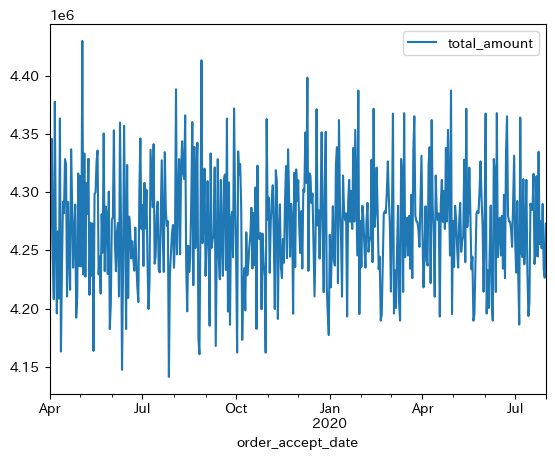

In [109]:
def graph_by_area(val):
    clear_output()
    display(toggle2)
    pick_data = order_data.loc[(order_data['wide_area']==val['new']) & (order_data['status'].isin([1, 2]))]
    temp = pick_data[['order_accept_date', 'total_amount']].copy()  
    temp.loc[:,'order_accept_date'] = pd.to_datetime(temp['order_accept_date'])
    temp.set_index('order_accept_date', inplace=True)
    temp.resample('D').sum().plot()

toggle2 = ToggleButtons(options=area_list)
toggle2.observe(graph_by_area, names='value')
display(toggle2)

##Let's Extract Data by Specifying a Date

In [110]:
from ipywidgets import DatePicker
import datetime

order_data.loc[:,'order_date'] = pd.to_datetime(order_data['order_accept_date']).dt.date

def order_by_date(val):
    clear_output()
    display(date_picker)
    pick_data = order_data.loc[(order_data['order_date'] == val['new']) & (order_data['status'].isin([1, 2]))]
    print(len(pick_data))
    display(pick_data.head())

date_picker = DatePicker(value=datetime.datetime(2020, 4, 1))
date_picker.observe(order_by_date, names='value')
display(date_picker)

DatePicker(value=datetime.date(2020, 4, 15))

6309


,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name,order_date
348098,85372689,183,C00133201,45,78008329,2020-04-15 11:00:00,2020-04-15 11:28:00,0,2388,2,日立店,IB,北関東,茨城,Delivery,Delivered,2020-04-15
348099,99873778,60,C36374795,57,7074009,2020-04-15 11:00:00,2020-04-15 11:17:00,0,3190,2,駒込店,TK,東京,東京,Delivery,Delivered,2020-04-15
348100,18734120,26,C38767197,0,92680350,2020-04-15 11:00:00,2020-04-15 11:13:00,0,2750,2,小金井店,TK,東京,東京,Delivery,Delivered,2020-04-15
348101,77376087,112,C97382186,56,41744429,2020-04-15 11:00:00,2020-04-15 11:44:00,0,1882,2,南足柄店,KN,神奈川,神奈川,Delivery,Delivered,2020-04-15
348102,80293130,8,C82425210,99,51782993,2020-04-15 11:00:00,2020-04-15 11:32:00,0,3742,2,板橋店,TK,東京,東京,Delivery,Delivered,2020-04-15


In [ ]:
min_date = datetime.date(2020, 4, 1)
max_date = datetime.date(2020, 4, 30)

###When a period of time is set, the function is called, and the period data is extracted and displayed on the screen.

In [112]:
## 期間が設定されたら呼ばれれる関数、期間データを抽出し画面に表示
def order_between_date():
    clear_output()
    display(date_picker_min)
    display(date_picker_max)
    pick_data = order_data.loc[(order_data['order_date'] >= min_date) & (order_data['order_date'] <= max_date) & (order_data['status'].isin([1, 2]))]
    print(len(pick_data))
    display(pick_data.head())

###Function to set a variable to the date of the minimum day (the period itself)

In [113]:
# 最小日（期間自）の日付を変数にセットする関数
def set_min_date(val):
    global min_date
    min_date = val['new']
    order_between_date()

### Function to set a variable to the date of the maximum day (the end of the period)

In [114]:
# 最大日（期間至）の日付を変数にセットする関数
def set_max_date(val):
    global max_date
    max_date = val['new']
    order_between_date()

In [115]:
date_picker_min = DatePicker(value=min_date)
date_picker_min.observe(set_min_date, names='value')
print("Min Date")
display(date_picker_min)
date_picker_max = DatePicker(value=max_date)
date_picker_max.observe(set_max_date, names='value')
print("Max Date")
display(date_picker_max)

DatePicker(value=datetime.date(2020, 4, 1))

DatePicker(value=datetime.date(2020, 4, 30))

189414


,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name,order_date
239780,79339111,49,C26387220,50,67393872,2020-04-01 11:00:00,2020-04-01 11:18:00,1,4144,1,浅草店,TK,東京,東京,Take Out,Payment Completed,2020-04-01
239781,18941733,85,C48773811,26,91834983,2020-04-01 11:00:00,2020-04-01 11:22:00,0,2877,2,目黒店,TK,東京,東京,Delivery,Delivered,2020-04-01
239782,56217880,76,C66287421,36,64409634,2020-04-01 11:00:00,2020-04-01 11:15:00,0,2603,2,本郷店,TK,東京,東京,Delivery,Delivered,2020-04-01
239783,28447783,190,C41156423,19,73032165,2020-04-01 11:00:00,2020-04-01 11:16:00,0,2732,2,栃木店,TO,北関東,栃木,Delivery,Delivered,2020-04-01
239784,32576156,191,C54568117,71,23281182,2020-04-01 11:00:00,2020-04-01 11:53:00,0,2987,2,伊勢崎店,GU,北関東,群馬,Delivery,Delivered,2020-04-01


##Let's build data with a story in mind!

In [ ]:
import glob
import os
current_dir = os.getcwd()
tbl_order_file = os.path.join(current_dir, 'tbl_order_*.csv')
tbl_order_files = glob.glob(tbl_order_file)

order_all = pd.DataFrame()
for file in tbl_order_files:
    order_tmp = pd.read_csv(file)
    print(f'{file}:{len(order_tmp)}')
    order_all = pd.concat([order_all, order_tmp], ignore_index=True)

In [ ]:
# 保守用店舗データの削除
order_all = order_all.loc[order_all['store_id'] != 999]

In [116]:
summary_df = order_all.loc[order_all['status'].isin([1, 2])]
store_summary_df = summary_df.groupby(['store_id'])['total_amount'].sum()
store_summary_df = pd.merge(store_summary_df, m_store, on='store_id', how='left')
print("Top Sales")
display(store_summary_df.sort_values('total_amount', ascending=False).head(10))
print("Worst Sales")
display(store_summary_df.sort_values('total_amount', ascending=True).head(10))

Top Sales


,store_id,total_amount,store_name,area_cd
47,48,64366823,上野店,TK
190,191,63244189,伊勢崎店,GU
67,68,60711488,八王子店,TK
43,44,60116231,世田谷店,TK
122,123,60113075,栄店,KN
62,63,60085181,西多摩店,TK
126,127,59987096,戸塚店,KN
172,173,59707287,戸田店,SA
99,100,59489668,中原店,KN
188,189,59209500,佐野店,TO


Worst Sales


,store_id,total_amount,store_name,area_cd
100,101,28637233,宮前店,KN
151,152,30395011,四街道店,CH
2,3,30563874,足立店,TK
75,76,30803883,本郷店,TK
11,12,31267975,西葛西店,TK
195,196,31652756,前橋店,GU
185,186,32462314,足利店,TO
69,70,33151890,東久留米店,TK
161,162,33207992,越谷店,SA
145,146,33554961,成田店,CH


In [117]:
cancel_df = pd.DataFrame()
cancel_cnt = order_all.loc[order_all['status']==9].groupby(['store_id'])['store_id'].count()
order_cnt = order_all.loc[order_all['status'].isin([1, 2, 9])].groupby(['store_id'])['store_id'].count()
cancel_rate = (cancel_cnt / order_cnt) * 100
cancel_df["cancel_rate"] = cancel_rate
cancel_df = pd.merge(cancel_df, m_store, on='store_id', how='left')
print("Low Cancel Rate")
display(cancel_df.sort_values('cancel_rate', ascending=True).head(10))
print("High Cancel Rate")
display(cancel_df.sort_values('cancel_rate', ascending=False).head(10))

Low Cancel Rate


,store_id,cancel_rate,store_name,area_cd
121,122,17.386496,港北店,KN
40,41,17.523984,荻窪店,TK
42,43,17.655494,向島店,TK
24,25,17.658237,南砂店,TK
109,110,17.666256,藤沢店,KN
117,118,17.686296,磯子店,KN
92,93,17.710222,小田原店,KN
19,20,17.716297,王子店,TK
137,138,17.740026,佐倉店,CH
146,147,17.765500,富津店,CH


High Cancel Rate


,store_id,cancel_rate,store_name,area_cd
17,18,19.249163,亀有店,TK
194,195,19.229531,館林店,GU
5,6,19.190864,荒川店,TK
23,24,19.164975,富岡店,TK
75,76,19.156062,本郷店,TK
138,139,19.109204,白井店,CH
7,8,19.079177,板橋店,TK
2,3,19.075145,足立店,TK
156,157,19.060454,川越店,SA
131,132,18.975597,市川店,CH


##Let's Analyze Reasons for Cancellation

In [118]:
def calc_delta(t):
    t1, t2 = t
    delta = t2 - t1
    return delta.total_seconds()/60

order_all.loc[:,'order_accept_datetime'] = pd.to_datetime(order_all['order_accept_date'])
order_all.loc[:,'delivered_datetime'] = pd.to_datetime(order_all['delivered_date'])
order_all.loc[:,'delta'] = order_all[['order_accept_datetime', 'delivered_datetime']].apply(calc_delta, axis=1)

delivery_df = order_all.loc[(order_all['status']==2) & (order_all['store_id'].isin([8, 122]))]
delivery_df.groupby(['store_id'])['delta'].mean()

store_id
8      47.535893
122    20.352935
Name: delta, dtype: float64

##Let's test a hypothesis

In [122]:
temp_cancel = cancel_df.copy()
temp_delivery = order_all.loc[order_all['status']==2].groupby([('store_id')])['delta'].mean()
check_df = pd.merge(temp_cancel, temp_delivery, on='store_id', how='left')
check_df.head()

,store_id,cancel_rate,store_name,area_cd,delta
0,1,18.882769,昭島店,TK,34.408222
1,2,18.367566,あきる野店,TK,34.589372
2,3,19.075145,足立店,TK,34.420679
3,4,18.752312,北千住店,TK,34.637692
4,5,18.348852,綾瀬店,TK,34.494387


In [119]:
# 全体
temp_chk = check_df[['cancel_rate', 'delta']]
display(temp_chk.corr())

,cancel_rate,delta
cancel_rate,1.000000,0.490048
delta,0.490048,1.000000


In [120]:
# キャンセル率が高い（第3四分位以上）店舗のみ
th_high = check_df['cancel_rate'].quantile(0.75)
temp_chk = check_df.loc[(check_df['cancel_rate'] >= th_high)]
temp_chk = temp_chk[['cancel_rate', 'delta']]
display(temp_chk.corr())

,cancel_rate,delta
cancel_rate,1.000000,0.353421
delta,0.353421,1.000000


In [121]:
# キャンセル率が低い（第1四分位以下）店舗のみ
th_low = check_df['cancel_rate'].quantile(0.25)
temp_chk = check_df.loc[(check_df['cancel_rate'] >= th_low)]
temp_chk = temp_chk[['cancel_rate', 'delta']]
display(temp_chk.corr())

,cancel_rate,delta
cancel_rate,1.000000,0.433597
delta,0.433597,1.000000


##Let's build a dashboard by combining parts and data based on a story

In [ ]:
import seaborn as sns

# 環境変数
target_store = ""
min_date = datetime.date(2020, 4, 1)
max_date = datetime.date(2020, 4, 30)

In [123]:
def make_board():
    clear_output()
    display(toggle_db)
    
    # データ作成処理
    pick_order_data = order_all.loc[(order_all['store_name']==target_store) & (order_all['order_date'] >= min_date) & (order_all['order_date'] <= max_date) & (order_all['status'].isin([1, 2]))]
    pick_cancel_data = order_all.loc[(order_all['store_name']==target_store) & (order_all['order_date'] >= min_date) & (order_all['order_date'] <= max_date) & (order_all['status']==9)]
    pick_order_all = order_all.loc[(order_all['order_date'] >= min_date) & (order_all['order_date'] <= max_date) & (order_all['status'].isin([1, 2]))]
    pick_cancel_all = order_all.loc[(order_all['order_date'] >= min_date) & (order_all['order_date'] <= max_date) & (order_all['status']==9)]
    store_o_cnt = len(pick_order_data)
    store_c_cnt = len(pick_order_data['customer_id'].unique())
    store_cancel_rate = (len(pick_cancel_data)/(len(pick_order_data)+len(pick_cancel_data))) * 100
    delivery_time = pick_order_data.loc[pick_order_data['status'] == 2]['delta'].mean()
    delivery_time_all = pick_order_all.loc[pick_order_all['status'] == 2]['delta'].mean()
    
    # 画面の描画処理
    temp = pick_order_data[['order_date', 'total_amount']].copy()
    temp.loc[:,'order_date'] = pd.to_datetime(temp['order_date'])
    temp.set_index('order_date', inplace=True)
    
    print("========================================================================================================")
    str_out = f"■■{target_store}■■ 【Target Period】：{min_date}～{max_date} "
    str_out = str_out + f"【Order Number】：{store_o_cnt} 件  【利用顧客数】: {store_c_cnt}"
    print(str_out)
    print("--------------------------------------------------------------------------------------------------------")
    print(f"■■■■■■ Sales/Day ■■■■■■■■")
    display(temp.resample('D').sum())
    print("--------------------------------------------------------------------------------------------------------")
    str_out = f"【Total Sales Amount】：{'{:,}'.format(temp['total_amount'].sum())} "
    str_out = str_out + f"【Total Cancel Amount】：{'{:,}'.format(pick_cancel_data['total_amount'].sum())} "
    str_out = str_out + f"【Cancel Rate】:{round(store_cancel_rate, 2)} % "
    print(str_out)
    str_out = f"【Average Delivery Time】：{round(delivery_time, 2)}Min"
    str_out = str_out + f"【Average Delivery Time/All Stores】：{round(delivery_time_all, 2)}分"
    print(str_out)
    print("--------------------------------------------------------------------------------------------------------")
    
    # グラフ作成処理
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
    sns.histplot(temp.resample('D').sum(), ax=ax1, kde=False)
    ax1.set_title("Sales (Daily) Histogram")
    
    sns.countplot(x='order_date', data=pick_cancel_data, ax=ax2)
    ax2.set_title("Cancel Number（/Day）")
        
    fig, (ax3) = plt.subplots(1, 1, figsize=(20 ,5))
    sns.boxplot(x="order_date", y="total_amount", data=pick_order_data)
    ax3.set_title("Order Status Boxplot")
          
    plt.show()


In [ ]:
# カレンダー変更時の処理
def change_date_min(val):
    global min_date
    min_data = val['new']
    make_board()

def change_date_max(val):
    global max_date
    max_date = val['new']
    make_board()

In [125]:
# ドロップダウン変更時の処理
def change_dropdown(val):
    global target_store
    target_store = val['new']
    
    # 期間指定機能
    date_picker_min = DatePicker(value=min_date)
    date_picker_min.observe(change_date_min, names='value')
    print("Period")
    date_picker_max = DatePicker(value=max_date)
    date_picker_max.observe(change_date_max, names='value')
    display(date_picker_min, date_picker_max)

In [126]:
# 地域トグルボタン処理
def order_by_area(val):
    clear_output()
    display(toggle_db)
    # 選択された地域の店舗リストを作成する
    store_list = order_all.loc[order_all['wide_area']==val['new']]['store_name'].unique()
    # 作成された店舗リストでドロップダウンを作成する
    dropdown = Dropdown(options=store_list)
    dropdown.observe(change_dropdown, names='value')
    display(dropdown)

In [ ]:
# 保守用店舗データの削除
order_all = order_all.loc[order_all['store_id'] != 999]

order_all = pd.merge(order_all, m_store, on='store_id', how='left')
order_all = pd.merge(order_all, m_area, on='area_cd', how='left')

# マスターにないコードに対応した文字列を設定
order_all.loc[order_all['takeout_flag'] == 0, 'takeout_name'] = 'Delivery'
order_all.loc[order_all['takeout_flag'] == 1, 'takeout_name'] = 'To Take Out'

order_all.loc[order_all['status'] == 0, 'status_name'] = 'Reception'
order_all.loc[order_all['status'] == 1, 'status_name'] = 'Payment Completed'
order_all.loc[order_all['status'] == 2, 'status_name'] = 'Delivered'
order_all.loc[order_all['status'] == 9, 'status_name'] = 'Cancel'

order_all.loc[:,'order_date'] = pd.to_datetime(order_all['order_accept_date']).dt.date

order_all.head()

ToggleButtons(index=1, options=('東京', '神奈川', '千葉', '埼玉', '北関東'), value='神奈川')

■■逗子店■■ 【Target Period】：2020-04-01～2020-04-29 【Order Number】：835 件  【利用顧客数】: 198
--------------------------------------------------------------------------------------------------------
■■■■■■ Sales/Day ■■■■■■■■


,total_amount
order_date,
2020-04-01,89061
2020-04-02,88286
2020-04-03,63547
2020-04-04,82490
2020-04-05,74106
2020-04-06,90034
2020-04-07,90661
2020-04-08,96694
2020-04-09,66707


--------------------------------------------------------------------------------------------------------
【Total Sales Amount】：2,374,471 【Total Cancel Amount】：523,807 【Cancel Rate】:18.14 % 
【Average Delivery Time】：35.26Min【Average Delivery Time/All Stores】：34.37分
--------------------------------------------------------------------------------------------------------


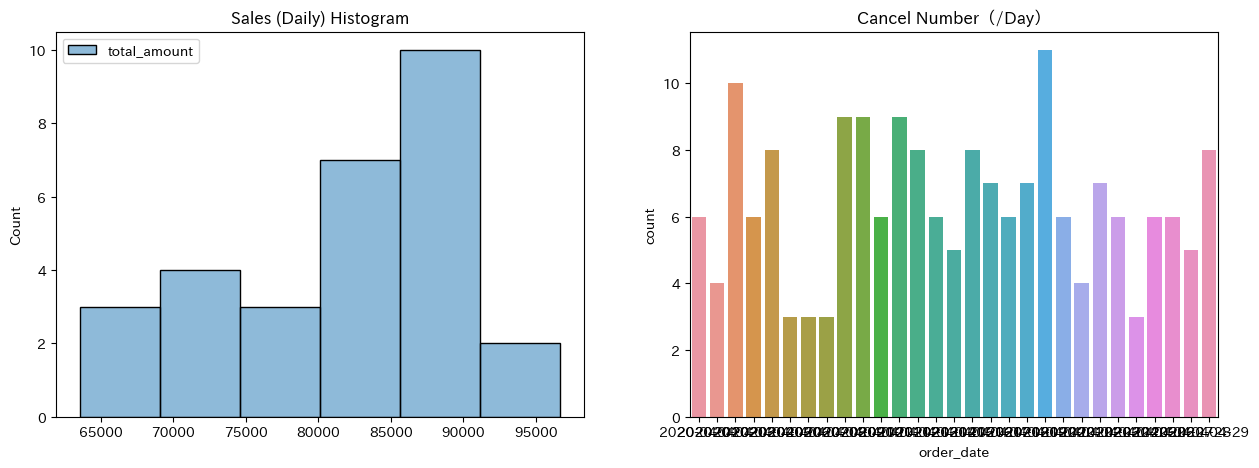

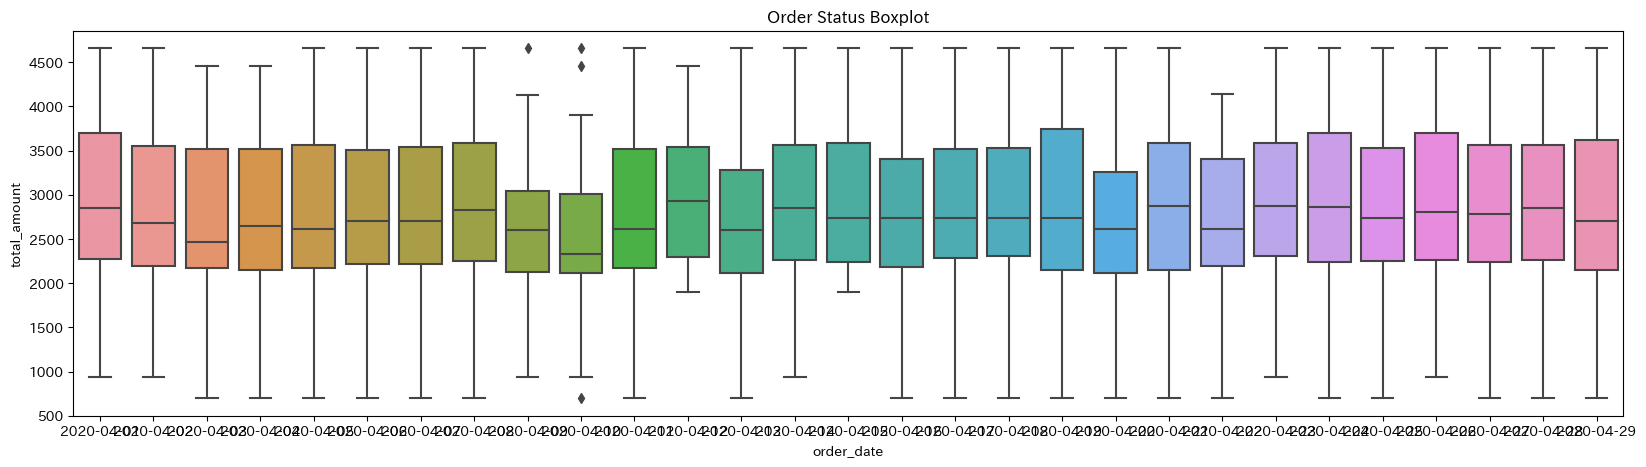

In [127]:
# トグルボタンを表示
toggle_db = ToggleButtons(options=area_list)
toggle_db.observe(order_by_area, names='value')
display(toggle_db)

In [ ]:
cal_orders_base = order_all.loc[(order_all['status'].isin([1, 2]))]
print(cal_orders_base.head())


In [128]:
cal_orders_base = order_all.loc[(order_all['status'].isin([1, 2]))]
    
# 地域のランキング（配達時間）
print("Delivery Time　＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝")
print("Area Rank ---------------")
display(pd.DataFrame(cal_orders_base.groupby(['narrow_area'])['delta'].mean().sort_values()))
print("Area Rank TOP5 ---------------")
for area in m_area['area_cd']:
    temp = cal_orders_base.loc[cal_orders_base['area_cd']==area]
    temp = temp.groupby(['store_id'])['delta'].mean().sort_values()
    temp = pd.merge(temp, m_store, on='store_id')[['store_name', 'delta']]
    display(temp.head())

Delivery Time　＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
Area Rank ---------------


,delta
narrow_area,
茨城,32.245760
神奈川,33.720522
東京,34.469934
群馬,34.487997
栃木,34.498405
埼玉,34.723126
千葉,34.974864


Area Rank TOP5 ---------------


,store_name,delta
0,荻窪店,20.263519
1,羽村店,20.277660
2,恵比寿店,20.360861
3,王子店,20.539104
4,武蔵野店,34.258421


,store_name,delta
0,金沢店,20.152391
1,栄店,20.290839
2,港北店,20.331152
3,南足柄店,34.161385
4,小田原店,34.250974


,store_name,delta
0,我孫子店,20.219008
1,富津店,34.222156
2,茂原店,34.273931
3,松戸店,34.294474
4,流山店,34.319224


,store_name,delta
0,上尾店,20.227034
1,入間店,34.234714
2,八潮店,34.293978
3,さいたま西店,34.322356
4,坂戸店,34.388798


,store_name,delta
0,那珂店,20.307394
1,日立店,34.430072
2,守谷店,34.443212
3,取手店,34.479958
4,水戸店,34.593175


,store_name,delta
0,栃木店,34.354394
1,宇都宮店,34.448884
2,足利店,34.483516
3,佐野店,34.517901
4,小山店,34.684970


,store_name,delta
0,前橋店,34.272803
1,桐生店,34.454933
2,伊勢崎店,34.506043
3,館林店,34.520858
4,高崎店,34.543569


In [129]:
# 地域のランキング（キャンセル率）
base_df = pd.merge(check_df, m_store, on='area_cd')
base_df = pd.merge(base_df, m_area, on='area_cd')
print("Cancel Rate　＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝")
print("Area Rank ---------------")
display(pd.DataFrame(base_df.groupby(['narrow_area'])['cancel_rate'].mean().sort_values()))
print("Area Rank TOP5 ---------------")
for area in m_area['area_cd']:
    temp = check_df.loc[check_df['area_cd']==area]
    temp = temp.groupby(['store_id'])['cancel_rate'].mean().sort_values()
    temp = pd.merge(temp, m_store, on='store_id')[['store_name', 'cancel_rate']]
    display(temp.head())

Cancel Rate　＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝＝
Area Rank ---------------


,cancel_rate
narrow_area,
茨城,18.158047
神奈川,18.266374
栃木,18.339084
千葉,18.364052
埼玉,18.400924
東京,18.415940
群馬,18.542965


Area Rank TOP5 ---------------


,store_name,cancel_rate
0,荻窪店,17.523984
1,向島店,17.655494
2,南砂店,17.658237
3,王子店,17.716297
4,西東京店,17.806656


,store_name,cancel_rate
0,港北店,17.386496
1,藤沢店,17.666256
2,磯子店,17.686296
3,小田原店,17.710222
4,鶴見店,17.803410


,store_name,cancel_rate
0,佐倉店,17.740026
1,富津店,17.765500
2,我孫子店,17.789955
3,柏店,18.115275
4,君津店,18.134101


,store_name,cancel_rate
0,上尾店,17.794405
1,東松山店,17.837761
2,大宮店,18.021119
3,川口店,18.076858
4,久喜店,18.079445


,store_name,cancel_rate
0,守谷店,17.912606
1,那珂店,18.004904
2,日立店,18.147806
3,水戸店,18.209919
4,つくば店,18.327818


,store_name,cancel_rate
0,足利店,18.011650
1,宇都宮店,18.282693
2,小山店,18.305106
3,佐野店,18.446881
4,栃木店,18.649088


,store_name,cancel_rate
0,伊勢崎店,18.004103
1,太田店,18.098559
2,高崎店,18.511587
3,前橋店,18.675150
4,桐生店,18.738858


#Build a reporting system

##Let's output the sales data of a specific store to Excel.

In [ ]:
import openpyxl

wb = openpyxl.Workbook()
ws = wb['Sheet']
ws.cell(1,1).value = '書き込みテストです。'
wb.save('test.xlsx')
wb.close()

In [ ]:
wb = openpyxl.load_workbook('test.xlsx', read_only=True)
ws = wb['Sheet']
print(ws.cell(1, 1).value)
wb.close()

In [ ]:
# テストデータの準備
store_id = 1
store_df = order_all.loc[order_all['store_id']==store_id].copy()
store_name = store_df['store_name'].unique()[0]
store_sales_total = store_df.loc[store_df['status'].isin([1, 2])]['total_amount'].sum()
store_sales_takeout = store_df.loc[store_df['status']==1]['total_amount'].sum()
store_sales_delivery = store_df.loc[store_df['status']==2]['total_amount'].sum()
print(f'Purchase Amount Check　{store_sales_total} = {store_sales_takeout + store_sales_delivery}')
output_df = store_df[['order_accept_date','customer_id','total_amount','takeout_name','status_name']]
output_df.head()

In [ ]:
from openpyxl.utils.dataframe import dataframe_to_rows

store_title = f'{store_id}_{store_name}'

wb = openpyxl.Workbook()
ws = wb.active
ws.title = store_title

ws.cell(1, 1).value = f'{store_title} Sales Data'

# OpenPyXLのユーティリティdataframe_to_rowsを利用
rows = dataframe_to_rows(output_df, index=False, header=True)

# 表の貼り付け位置
row_start = 3
col_start = 2

for row_no, row in enumerate(rows, row_start):
    for col_no, value in enumerate(row, col_start):
        ws.cell(row_no, col_no).value = value

filename = f'{store_title}.xlsx'
wb.save(filename)
wb.close()

##Let's prepare and output an Excel table

In [ ]:
# スタイル関係のインポート
from openpyxl.styles import PatternFill, Border, Side, Font

openpyxl.load_workbook(filename)
ws = wb[store_title]

side = Side(style='thin', color='008080')
border = Border(top=side, bottom=side, left=side, right=side)

# データの表の部分に罫線を設定
for row in ws:
    for cell in row:
        if ws[cell.coordinate].value:
            ws[cell.coordinate].border = border

In [ ]:
ws.cell(1,1).font = Font(bold=True, color='008080')

cell = ws.cell(3, 2)
cell.fill = PatternFill(patternType='solid', fgColor='008080')
cell.value = 'Order Acceptance Date/Time'
cell.font = Font(bold=True, color='FFFFFF')

cell = ws.cell(3, 3)
cell.fill = PatternFill(patternType='solid', fgColor='008080')
cell.value = 'Customer ID'
cell.font = Font(bold=True, color='FFFFFF')

cell = ws.cell(3, 4)
cell.fill = PatternFill(patternType='solid', fgColor='008080')
cell.value = 'Purchase Amount'
cell.font = Font(bold=True, color='FFFFFF')

cell = ws.cell(3, 5)
cell.fill = PatternFill(patternType='solid', fgColor='008080')
cell.value = 'Order Type'
cell.font = Font(bold=True, color='FFFFFF')

cell = ws.cell(3, 6)
cell.fill = PatternFill(patternType='solid', fgColor='008080')
cell.value = 'Order Status'
cell.font = Font(bold=True, color='FFFFFF')

ws.column_dimensions['A'].width = 20
ws.column_dimensions['B'].width = 20
ws.column_dimensions['C'].width = 12
ws.column_dimensions['D'].width = 12
ws.column_dimensions['E'].width = 12
ws.column_dimensions['F'].width = 12

# ファイルに保存
wb.save(filename)
wb.close()

##Let's output data other than sales data

In [ ]:
def calc_delta(t):
    t1, t2 = t
    delta = t2 - t1
    return delta.total_seconds()/60

store_df.loc[:,'order_accept_datetime'] = pd.to_datetime(store_df['order_accept_date'])
store_df.loc[:,'delivered_datetime'] = pd.to_datetime(store_df['delivered_date'])
store_df.loc[:,'delta'] = store_df[['order_accept_datetime', 'delivered_datetime']].apply(calc_delta, axis=1)

delivery_time = store_df.groupby(['store_id'])['delta'].describe()
delivery_time

In [ ]:
openpyxl.load_workbook(filename)
ws = wb[store_title]

cell = ws.cell(1, 7)
cell.value = f'time to complete delivery'
cell.font = Font(bold=True, color='008080')

rows = dataframe_to_rows(delivery_time, index=False, header=True)

# 表の貼り付け位置
row_start = 3
col_start = 8

for row_no, row in enumerate(rows, row_start):
    for col_no, value in enumerate(row, col_start):
        cell = ws.cell(row_no, col_no)
        cell.value = value
        cell.border = border
        if row_no == row_start:
            cell.fill = PatternFill(patternType='solid', fgColor='008080')
            cell.font = Font(bold=True, color='FFFFFF')
        
filename = f'{store_title}.xlsx'
wb.save(filename)
wb.close()

##Output problematic parts in red

In [ ]:
openpyxl.load_workbook(filename)
ws = wb[store_title]

rows = dataframe_to_rows(output_df, index=False, header=True)

# 表の貼り付け位置
row_start = 3
col_start = 2


for row_no, row in enumerate(rows, row_start):
    if row_no == row_start:
        continue
    for col_no, value in enumerate(row, col_start):
        ws.cell(row_no, col_no).value = value
        if value == 'Cancel':
            ws.cell(row_no, col_no).font = Font(bold=True, color='FF0000')

filename = f'{store_title}.xlsx'
wb.save(filename)
wb.close()

##Use Excel cell functions to create daily totals

In [ ]:
openpyxl.load_workbook(filename)
ws = wb[store_title]

cell = ws.cell(7, 7)
cell.value = 'Aggregate'
cell.font = Font(bold=True, color='008080')

cell = ws.cell(8,8)
cell.value = 'Total amount of data'
cell.font = Font(bold=True, color='008080')

cell = ws.cell(8,10)
cell.value = f'=SUM(D4:D{ws.max_row})'

cell = ws.cell(9,8)
cell.value = '　/ Settlement Amount'
cell.font = Font(bold=True)

cell = ws.cell(9,10)
cell.value = f'=SUMIF(F4:F{ws.max_row},"<>Cancel",D4:D{ws.max_row})'

cell = ws.cell(10,8)
cell.value = '　/ Cancel Amount'
cell.font = Font(bold=True)

cell = ws.cell(10,10)
cell.value = f'=SUMIF(F4:F{ws.max_row},"=Cancel",D4:D{ws.max_row})'

filename = f'{store_title}.xlsx'
wb.save(filename)
wb.close()

##Let's try outputting data as a line graph

In [ ]:
from openpyxl.chart import Reference, BarChart, PieChart, LineChart, ScatterChart, Series

openpyxl.load_workbook(filename)
ws = wb[store_title]

cell = ws.cell(7, 7)
cell.value = f'Sales Graph'
cell.font = Font(bold=True, color='008080')

# グラフ用の参照データを指定、D列（購入総額）の4行目から20件を指定
refy = Reference(ws, min_col=4, min_row=4, max_col=4, max_row=23)

# グラフシリーズを生成
series = Series(refy, title='Sales Amount')

# Chart
chart = LineChart()
chart.title = 'Line Graph'
chart.x_axis.title = 'Number'
chart.y_axis.title = 'Sales Amount'
chart.height = 10
chart.width = 20
chart.series.append(series)

# 生成したChartオブジェクトをシートの指定位置に追加
ws.add_chart(chart, 'H12')

filename = f'{store_title}.xlsx'
wb.save(filename)
wb.close()

##Let's prepare data for reports

In [ ]:
# キャンセル率ランキングデータを準備
cancel_df = pd.DataFrame()
cancel_cnt = order_all.loc[order_all['status']==9].groupby(['store_id'])['store_id'].count()
order_cnt = order_all.loc[order_all['status'].isin([1, 2, 9])].groupby(['store_id'])['store_id'].count()
cancel_rate = (cancel_cnt / order_cnt) * 100
cancel_df['cancel_rate'] = cancel_rate
cancel_df = pd.merge(cancel_df, m_store, on='store_id', how='left')
cancel_rank = cancel_df.sort_values('cancel_rate', ascending=True).reset_index()

def check_store_cancel_rank(trg_id):
    tmp = cancel_rank.loc[cancel_rank['store_id']==trg_id].index + 1
    return tmp[0]

In [ ]:
def get_area_df(trg_id):
    # 該当店舗が属する、地域別データの集計と売上ランク
    area_df = pd.DataFrame()
    area_df = order_all.loc[order_all['area_cd']==store_df['area_cd'].unique()[0]]
    area_df = area_df.loc[area_df['status'].isin([1, 2])]
    return area_df

def get_area_rank_df(trg_id):
    area_df = get_area_df(trg_id)
    area_rank = area_df.groupby(['store_id'])['total_amount'].sum().sort_values(ascending=False)
    area_rank = pd.merge(area_rank, m_store, on='store_id', how='left')
    
    return area_rank

def check_store_sales_rank(trg_id):
    area_rank = get_area_rank_df(trg_id)
    
    tmp = area_rank.loc[area_rank['store_id']==trg_id].index + 1
    return tmp[0]

In [ ]:
def make_store_daily(trg_id):
    # 該当店舗の日毎売上データ
    tmp_store_df = order_all.loc[(order_all['store_id']==trg_id) & (order_all['status'].isin([1, 2]))]
    tmp = tmp_store_df[['order_accept_date', 'total_amount']].copy()  
    tmp.loc[:,'order_accept_date'] = pd.to_datetime(tmp['order_accept_date'])
    tmp.set_index('order_accept_date', inplace=True)
    tmp = tmp.resample('D').sum().reset_index()
    
    return tmp

In [ ]:
def get_area_delivery(trg_id):
    # 該当店舗が属する、地域別データの配達完了までの時間ランク
    area_delivery = pd.DataFrame()
    area_df = get_area_df(trg_id)
    area_delivery = area_df.loc[area_df['status']==2].copy()

    area_delivery.loc[:,'order_accept_datetime'] = pd.to_datetime(area_delivery['order_accept_date'])
    area_delivery.loc[:,'delivered_datetime'] = pd.to_datetime(area_delivery['delivered_date'])
    area_delivery.loc[:,'delta'] = area_delivery[['order_accept_datetime', 'delivered_datetime']].apply(calc_delta, axis=1)

    return area_delivery

def get_area_delivery_rank_df(trg_id):
    area_delivery = get_area_delivery(trg_id)
    area_delivery_rank = area_delivery.groupby(['store_id'])['delta'].mean().sort_values()
    area_delivery_rank = pd.merge(area_delivery_rank, m_store, on='store_id', how='left')
    
    return area_delivery_rank
    
def check_store_delivery_rank(trg_id):
    area_delivery_rank = get_area_delivery_rank_df(trg_id)
    
    tmp = area_delivery_rank.loc[area_delivery_rank['store_id']==trg_id].index + 1
    return tmp[0]

##Let's output necessary data to a data sheet

In [ ]:
# 最初にテスト用のファイルを削除
if os.path.exists('test.xlsx') : os.remove('test.xlsx')
if os.path.exists(filename): os.remove(filename)

In [ ]:
def data_sheet_output(trg_wb, sheetname, target_df, indexFlg):
    ws = trg_wb.create_sheet(title=sheetname)

    rows = dataframe_to_rows(target_df, index=indexFlg, header=True)

    # 表の貼り付け位置
    row_start = 1
    col_start = 1

    for row_no, row in enumerate(rows, row_start):
        for col_no, value in enumerate(row, col_start):
            ws.cell(row_no, col_no).value = value

    # データシートは非表示にしておく
    ws.sheet_state = 'hidden'

In [ ]:
def make_data_sheet(trg_id, trg_st_df, targetfolder):
    target_daily = make_store_daily(trg_id)    
    store_name = trg_st_df['store_name'].unique()[0]
    
    # 新たにファイルを作成する
    store_title = f'{trg_id}_{store_name}'

    wb = openpyxl.Workbook()
    
    # キャンセルランキング
    data_sheet_output(wb, 'Data_CancelRank', cancel_rank, False)
    # エリア売上ランキング
    data_sheet_output(wb, 'Data_AreaRank', get_area_rank_df(trg_id), False)
    # エリア配達時間ランキング
    data_sheet_output(wb, 'Data_DeliveryRank', get_area_delivery_rank_df(trg_id), False)
    # 該当店舗の日単位売上データ
    data_sheet_output(wb, 'Data_Target_Daily', target_daily, False)
    
    filename = os.path.join(targetfolder, f'{store_title}.xlsx')
    wb.save(filename)
    wb.close()
    
    return filename

In [ ]:
filename_store = make_data_sheet(store_id, store_df, '')

##Let's create a summary sheet

In [ ]:
def make_summary_sheet(trg_id, storename, trgfile):
    target_cancel_rank = check_store_cancel_rank(trg_id)
    target_sales_rank = check_store_sales_rank(trg_id)
    target_delivery_rank = check_store_delivery_rank(trg_id)
    
    wb = openpyxl.load_workbook(trgfile)
    ws = wb.active
    ws.title = 'Summary Report'

    cell = ws.cell(1,1)
    cell.value = f'{storename} Summary Report（April～June）'
    cell.font = Font(bold=True, color='008080', size=20)

    ## 売上ランキングの表示
    tmpWs = wb['Data_Target_Daily']
    cell = ws.cell(3, 2)
    cell.value = 'Store Sales'
    cell.font = Font(bold=True, color='008080', size=16)
    
    # セルの結合
    ws.merge_cells('E3:F3')
    
    cell = ws.cell(3, 5)
    cell.value = f'=SUM({tmpWs.title}!B2:B{tmpWs.max_row})'
    cell.font = Font(bold=True, color='0080FF', size=16)
    cell.number_format = '#,##0'
    
    cell = ws.cell(4, 2)
    cell.value = 'Store Sales Rank'
    cell.font = Font(bold=True, color='008080', size=16)

    cell = ws.cell(4, 5)
    cell.value = f'Your Rank is　{target_sales_rank} out of {len(m_store)}'
    cell.font = Font(bold=True, color='0080FF', size=16)

     # グラフ用の参照データを指定
    refy = Reference(tmpWs, min_col=2, min_row=2, max_col=2, max_row=tmpWs.max_row)

    # グラフシリーズを生成
    series = Series(refy, title='Sales Amount')

    # Chart
    chart = LineChart()
    chart.title = 'Sales（per Day）'
    chart.x_axis.title = 'number'
    chart.y_axis.title = 'Sales'
    chart.height = 10
    chart.width = 15
    chart.series.append(series)

    # 生成したChartオブジェクトをシートの指定位置に追加
    ws.add_chart(chart, 'B6')
    
    # 地域情報
    tmpWs = wb['Data_AreaRank']
    
    cell = ws.cell(4, 10)
    cell.value = 'Area Store Sales Information'
    cell.font = Font(bold=True, color='008080', size=16)
    
    cell = ws.cell(5, 11)
    cell.value = 'MAX'
    
    cell = ws.cell(5, 12)
    cell.value = f'=MAX({tmpWs.title}!B2:B{tmpWs.max_row})'
    cell.number_format = '#,##0'
    
    cell = ws.cell(6, 11)
    cell.value = 'Min'
    
    cell = ws.cell(6, 12)
    cell.value = f'=MIN({tmpWs.title}!B2:B{tmpWs.max_row})'
    cell.number_format = '#,##0'
    
    cell = ws.cell(7, 11)
    cell.value = 'Area Average'
    
    cell = ws.cell(7, 12)
    cell.value = f'=AVERAGE({tmpWs.title}!B2:B{tmpWs.max_row})'
    cell.number_format = '#,##0'
    
    ## キャンセル率の表示
    cell = ws.cell(11, 10)
    cell.value = 'Cancel Rank'
    cell.font = Font(bold=True, color='008080', size=16)

    cell = ws.cell(12, 11)
    f'Your Rank is　{target_sales_rank} out of {len(m_store)}'
    cell.font = Font(bold=True, color='0080FF', size=16)
    
    tmpWs = wb['Data_CancelRank']
    
    cell = ws.cell(13, 11)
    cell.value = 'Area Average'
    
    cell = ws.cell(13, 12)
    cell.value = f'=AVERAGE({tmpWs.title}!C2:C{tmpWs.max_row})'
    cell.number_format = '0.00'

    ## 配達時間ランキングの表示
    cell = ws.cell(15, 10)
    cell.value = 'Deliery Serving Time'
    cell.font = Font(bold=True, color='008080', size=16)

    cell = ws.cell(16, 11)
    f'Your Rank is　{target_sales_rank} out of {len(m_store)}'
    cell.font = Font(bold=True, color='0080FF', size=16)

    tmpWs = wb['Data_DeliveryRank']
    
    cell = ws.cell(17, 11)
    cell.value = 'Area Average'
    
    cell = ws.cell(17, 12)
    cell.value = f'=AVERAGE({tmpWs.title}!B2:B{tmpWs.max_row})'
    cell.number_format = '0.00'
    
    wb.save(trgfile)
    wb.close()

In [ ]:
make_summary_sheet(store_id, store_name, filename_store)

##Let's output reports by store in Excel

In [ ]:
os.makedirs('output',exist_ok=True)

for store in m_store['store_id'].tolist():
    if store != 999:
        store_df = order_all.loc[order_all['store_id']==store]
        store_name = m_store.loc[m_store['store_id']==store]['store_name']
        print(store_name)
               
        tmp_file_name = make_data_sheet(store, store_df, 'output')
        make_summary_sheet(store, store_name.values[0], tmp_file_name)
        
print('Output Success')